In [95]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [96]:
df_customer=pd.read_csv(r"C:\Users\skd53\OneDrive\Machine learning\ML_classification_project\customers.csv")
df_loan=pd.read_csv(r"C:\Users\skd53\OneDrive\Machine learning\ML_classification_project\loans.csv")
df_bureau=pd.read_csv(r"C:\Users\skd53\OneDrive\Machine learning\ML_classification_project\bureau_data.csv")


In [97]:
print(df_bureau.shape,df_customer.shape,df_loan.shape)

(50000, 8) (50000, 12) (50000, 15)


In [98]:
df_loan.head(3)

,loan_id,cust_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,L00001,C00001,Auto,Secured,3004000,2467000,49340.0,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,L00002,C00002,Home,Secured,4161000,3883000,77660.0,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,L00003,C00003,Personal,Unsecured,2401000,2170000,43400.0,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False


In [99]:
df_customer.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,110001
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,600001
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,West Bengal,700001


In [100]:
df=pd.merge(df_customer,df_loan,on="cust_id")
df.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2467000,49340.0,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,3883000,77660.0,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2170000,43400.0,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False


In [101]:
df=pd.merge(df,df_bureau)
df.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2019-07-24,2019-08-10,False,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,2019-07-24,2019-08-15,False,3,1,96,12,60,5,4
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2019-07-24,2019-08-21,False,2,1,82,24,147,6,58
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,...,2019-07-24,2019-08-09,False,3,0,115,15,87,5,26
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,...,2019-07-24,2019-08-02,False,4,2,120,0,0,5,10


In [102]:
df["default"]=df["default"].astype(int)
df.default.value_counts()

default
0    45703
1     4297
Name: count, dtype: int64

In [103]:
X=df.drop("default",axis="columns")
y=df["default"]
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.25,random_state=42)

In [104]:
df_train=pd.concat([X_train,y_train],axis='columns')
df_test=pd.concat([X_test,y_test],axis='columns')


In [105]:
df_train.shape,df_test.shape

((37500, 33), (12500, 33))

In [106]:
df_train.isna().sum()

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 47
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd     

In [107]:
df_train["residence_type"].unique()

array(['Owned', 'Mortgage', 'Rented', nan], dtype=object)

In [108]:
df_train.residence_type.mode()[0]

'Owned'

In [109]:
df_train["residence_type"].fillna(df_train.residence_type.mode()[0],inplace=True)
df_train.isna().sum()

C:\Users\skd53\AppData\Local\Temp\ipykernel_17748\3901004972.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train["residence_type"].fillna(df_train.residence_type.mode()[0],inplace=True)


cust_id                        0
age                            0
gender                         0
marital_status                 0
employment_status              0
income                         0
number_of_dependants           0
residence_type                 0
years_at_current_address       0
city                           0
state                          0
zipcode                        0
loan_id                        0
loan_purpose                   0
loan_type                      0
sanction_amount                0
loan_amount                    0
processing_fee                 0
gst                            0
net_disbursement               0
loan_tenure_months             0
principal_outstanding          0
bank_balance_at_application    0
disbursal_date                 0
installment_start_dt           0
number_of_open_accounts        0
number_of_closed_accounts      0
total_loan_months              0
delinquent_months              0
total_dpd                      0
enquiry_co

In [110]:
df_train["residence_type"].unique()

array(['Owned', 'Mortgage', 'Rented'], dtype=object)

In [111]:
df_test.residence_type.fillna(df_train.residence_type.mode()[0],inplace=True)

C:\Users\skd53\AppData\Local\Temp\ipykernel_17748\3912580880.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test.residence_type.fillna(df_train.residence_type.mode()[0],inplace=True)


In [112]:
df_train.duplicated().sum()

np.int64(0)

In [113]:
df_train.describe()

,age,income,number_of_dependants,years_at_current_address,zipcode,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,...,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
count,37500.000000,3.750000e+04,37500.000000,37500.000000,37500.000000,3.750000e+04,3.750000e+04,3.750000e+04,3.750000e+04,3.750000e+04,...,3.750000e+04,3.750000e+04,37500.000000,37500.000000,37500.00000,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000
mean,39.540587,2.633326e+06,1.944533,15.997787,418866.253333,4.699692e+06,3.996068e+06,8.029068e+04,7.192922e+05,3.196854e+06,...,1.333820e+06,9.862989e+05,2.502907,1.001120,76.11104,4.844853,26.672613,5.008533,43.424880,0.085947
std,9.858344,2.623781e+06,1.535943,8.921041,169035.021773,6.257833e+06,5.371862e+06,1.131281e+05,9.669352e+05,4.297490e+06,...,1.213674e+06,1.043145e+06,1.119070,0.814021,43.76852,5.841396,32.779424,2.029236,29.392857,0.280289
min,18.000000,0.000000e+00,0.000000,1.000000,110001.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-1.000000e+00,0.000000e+00,1.000000,0.000000,1.00000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,33.000000,8.020000e+05,0.000000,8.000000,302001.000000,1.142000e+06,9.610000e+05,1.922000e+04,1.729800e+05,7.688000e+05,...,4.221975e+05,2.870402e+05,1.000000,0.000000,42.00000,0.000000,0.000000,4.000000,18.000000,0.000000
50%,39.000000,1.885000e+06,2.000000,16.000000,400001.000000,2.644000e+06,2.230000e+06,4.460000e+04,4.014000e+05,1.784000e+06,...,9.974275e+05,6.650145e+05,3.000000,1.000000,71.00000,3.000000,13.000000,5.000000,39.000000,0.000000
75%,46.000000,3.326250e+06,3.000000,24.000000,560001.000000,5.178000e+06,4.619000e+06,9.242000e+04,8.314200e+05,3.695200e+06,...,1.784879e+06,1.234063e+06,4.000000,2.000000,107.00000,8.000000,46.000000,6.000000,67.000000,0.000000
max,70.000000,1.199900e+07,5.000000,31.000000,700001.000000,5.217500e+07,4.781900e+07,5.293544e+06,8.607420e+06,3.825520e+07,...,5.000000e+06,7.846643e+06,4.000000,2.000000,223.00000,24.000000,171.000000,9.000000,99.000000,1.000000


In [114]:
df_train.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default'],
      dtype='object')

In [115]:
numerical_columns=["age","income","number_of_dependants","years_at_current_address","zipcode","sanction_amount","loan_amount","processing_fee","gst","net_disbursement","principal_outstanding","bank_balance_at_application","number_of_open_accounts","number_of_closed_accounts","total_loan_months","delinquent_months","total_dpd"
,"enquiry_count","credit_utilization_ratio"]
Category_columns=["gender","marital_status","employment_status","residence_type","city","state","zipcode","loan_purpose","loan_type","default"]




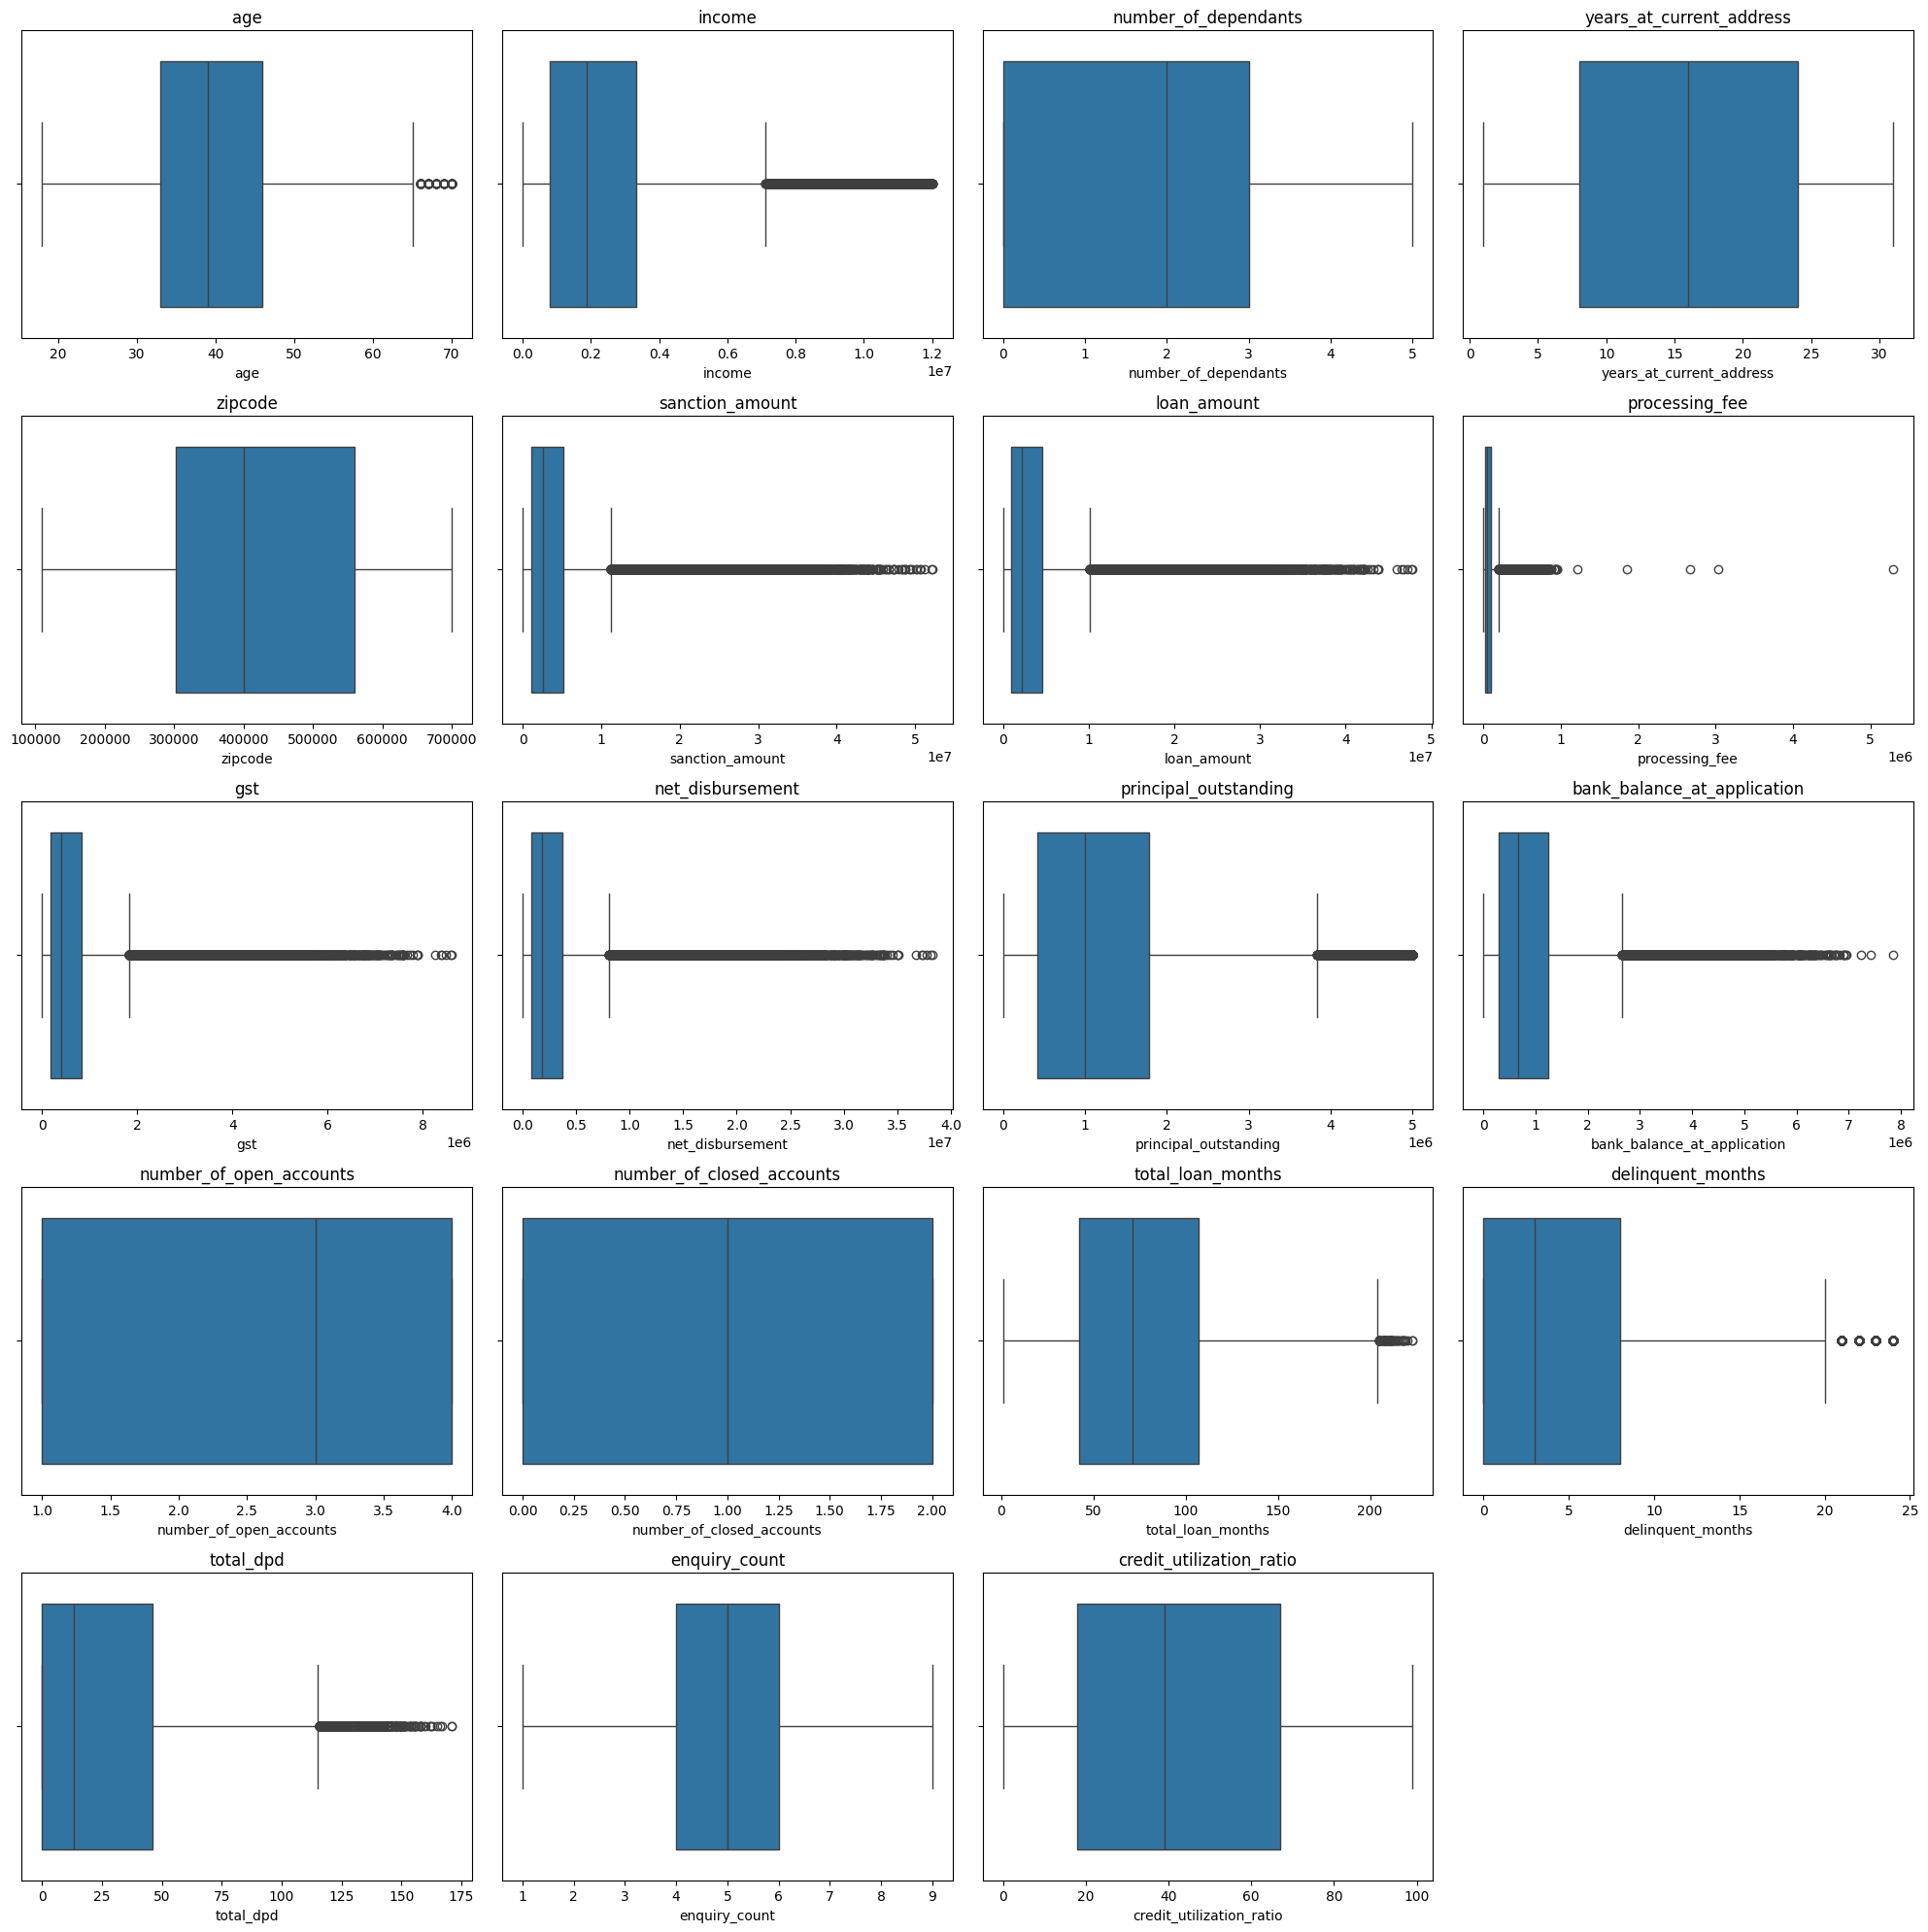

In [116]:
cols_per_row = 4  

# Calculate rows needed
rows = (len(numerical_columns) + cols_per_row - 1) // cols_per_row

# Set figure size
plt.figure(figsize=(cols_per_row*5, rows*4))

# Loop through each numerical column
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(rows, cols_per_row, i)
    sns.boxplot(x=df_train[col])  # vertical boxplot
    plt.title(col)

plt.tight_layout()
plt.show()

# for col in numerical_columns:
#     sns.boxplot(df_train[col])

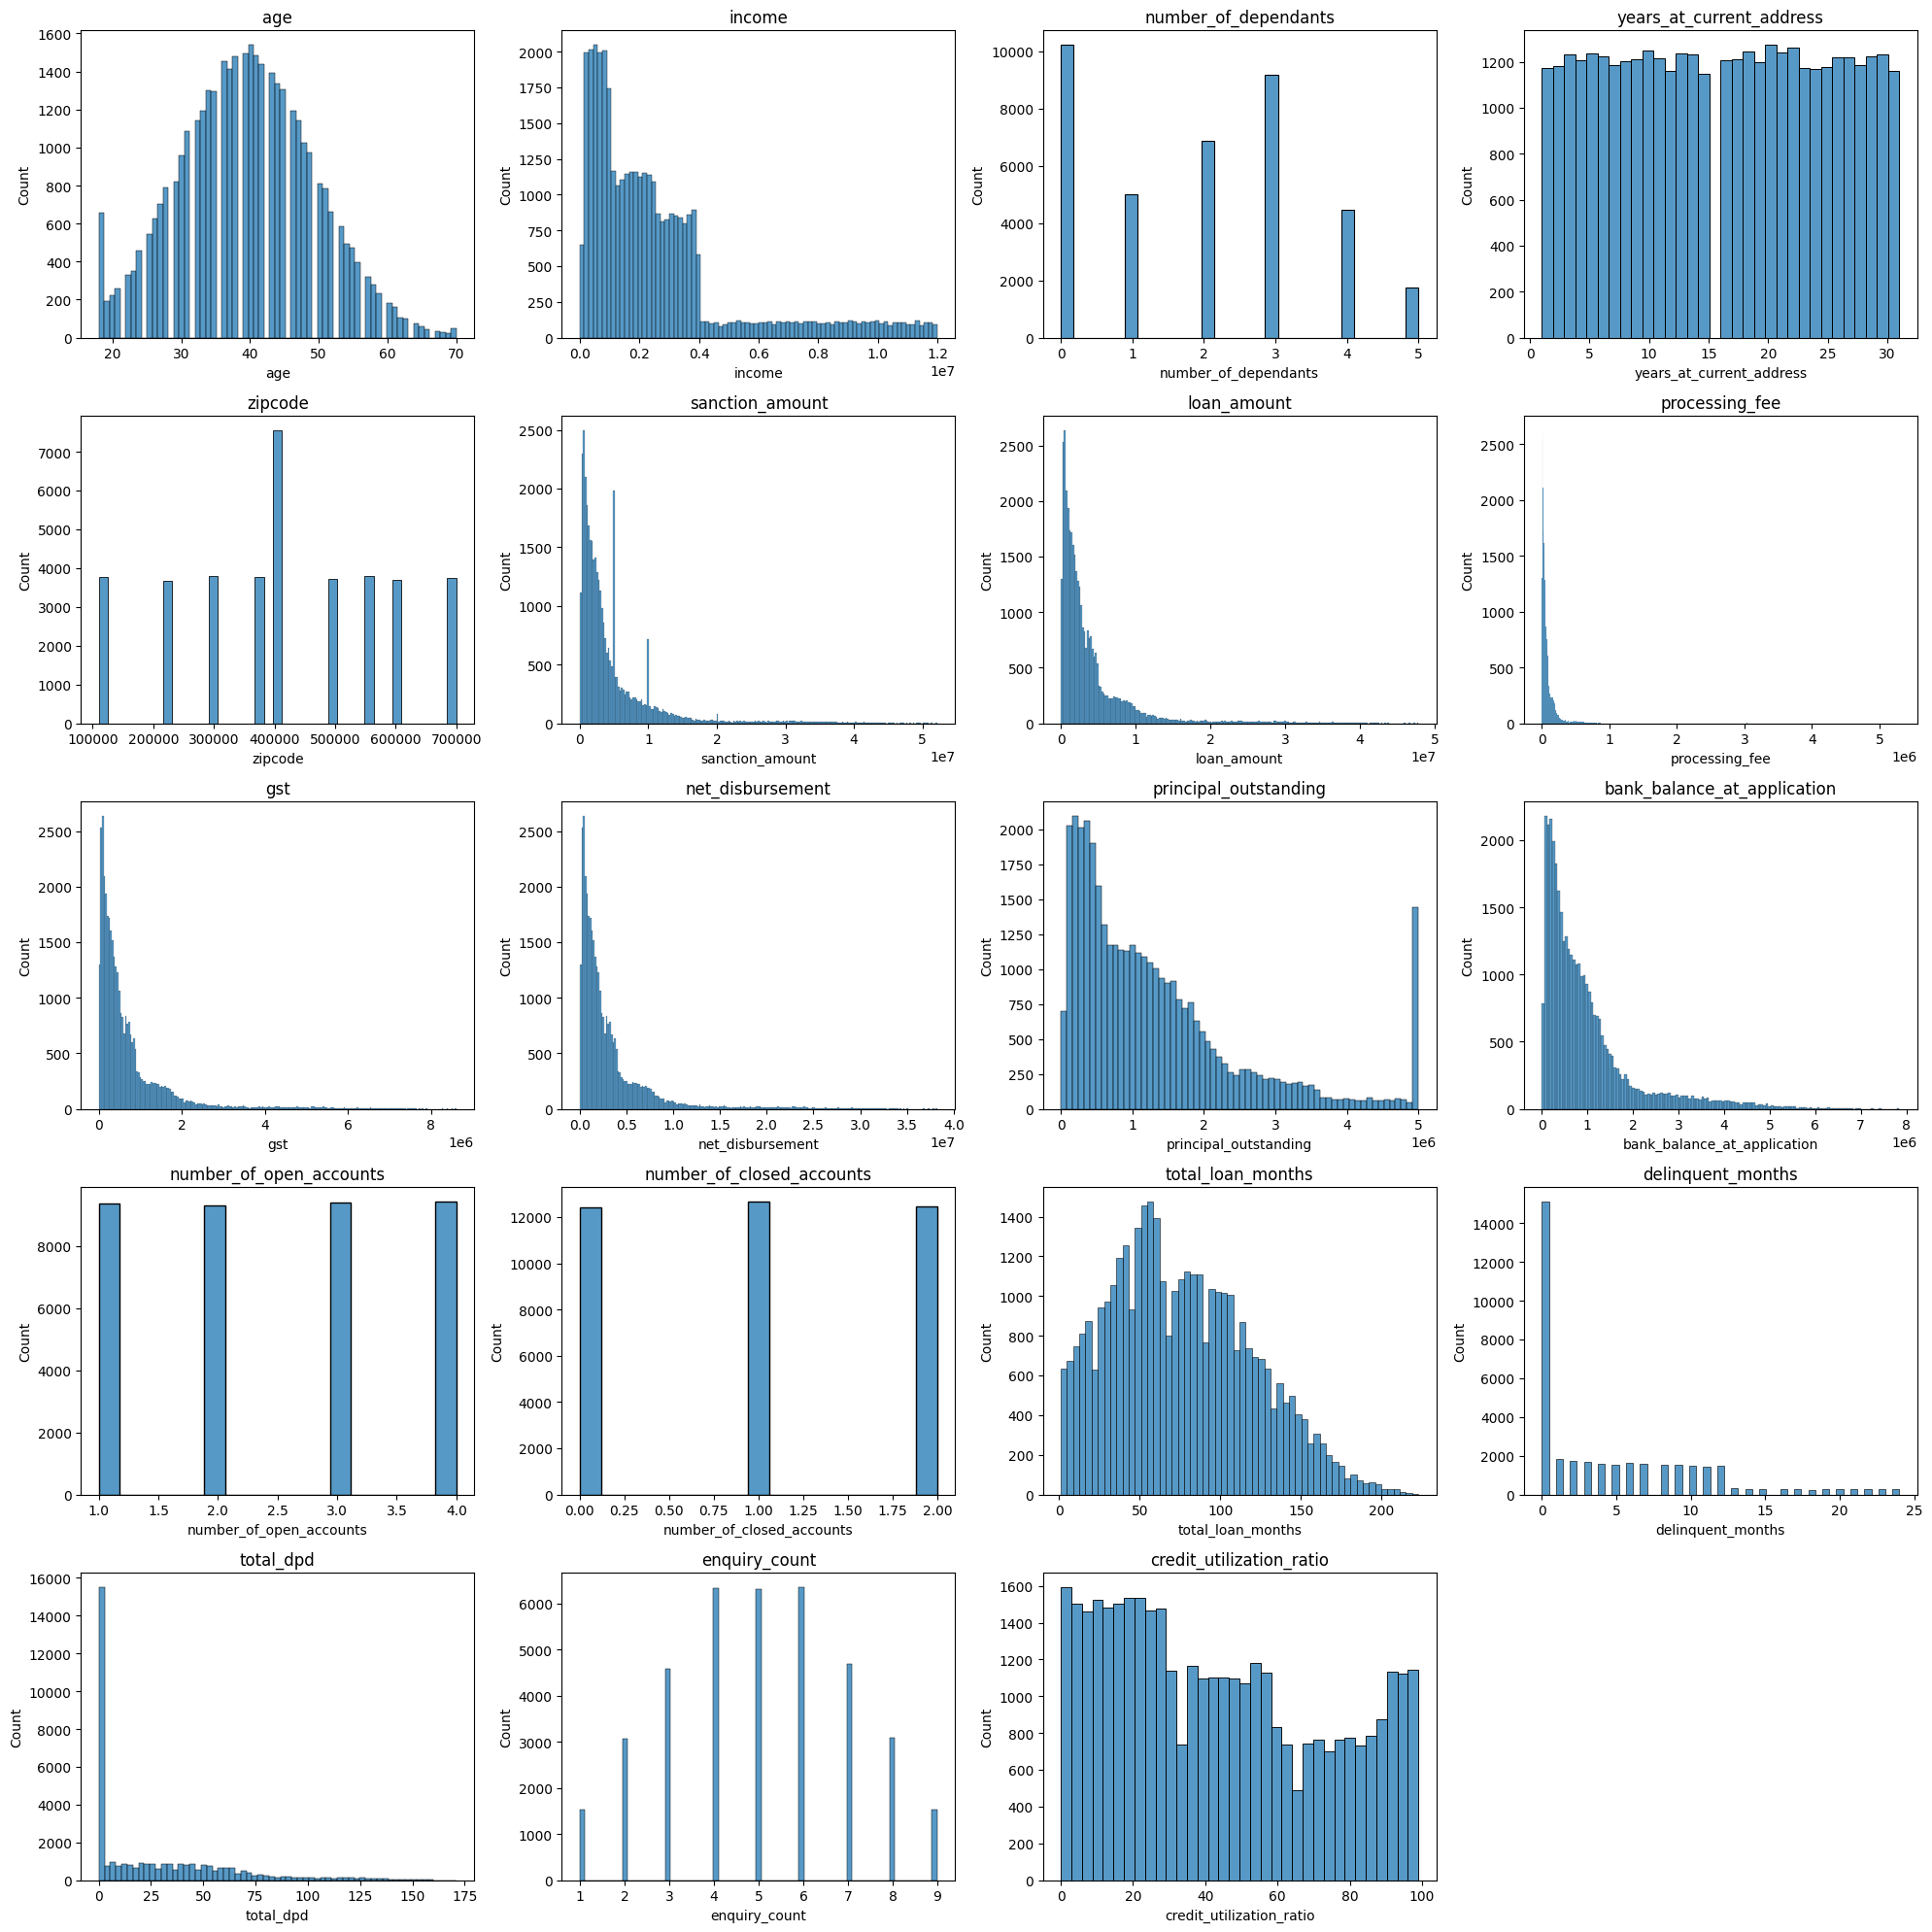

In [117]:
cols_per_row = 4  

# Calculate rows needed
rows = (len(numerical_columns) + cols_per_row - 1) // cols_per_row

# Set figure size
plt.figure(figsize=(cols_per_row*5, rows*4))

# Loop through each numerical column
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(rows, cols_per_row, i)
    sns.histplot(x=df_train[col])  # vertical boxplot
    plt.title(col)

plt.tight_layout()
plt.show()

In [118]:
df_train[df_train["processing_fee"] > df_train["loan_amount"].max()][["loan_amount", "processing_fee"]]


,loan_amount,processing_fee


In [119]:
df_train[(df_train["processing_fee"] / df_train["loan_amount"].max())>0.03][["loan_amount", "processing_fee"]]


,loan_amount,processing_fee
23981,2234000,2.669791e+06
47089,1738000,1.858965e+06
29305,2616000,3.036378e+06
9898,3626000,5.293544e+06


In [120]:
for col in Category_columns:
    print(df_train[col].unique())

['M' 'F']
['Married' 'Single']
['Self-Employed' 'Salaried']
['Owned' 'Mortgage' 'Rented']
['Hyderabad' 'Mumbai' 'Chennai' 'Bangalore' 'Pune' 'Kolkata' 'Ahmedabad'
 'Delhi' 'Lucknow' 'Jaipur']
['Telangana' 'Maharashtra' 'Tamil Nadu' 'Karnataka' 'West Bengal'
 'Gujarat' 'Delhi' 'Uttar Pradesh' 'Rajasthan']
[500001 400001 600001 560001 411001 700001 380001 110001 226001 302001]
['Home' 'Education' 'Personal' 'Auto' 'Personaal']
['Secured' 'Unsecured']
[0 1]


In [121]:
df_train["loan_purpose"]=df_train["loan_purpose"].replace("Personaal","Personal")
df_test["loan_purpose"]=df_test["loan_purpose"].replace("Personaal","Personal")

In [122]:
df_test.loan_purpose.unique()

array(['Home', 'Education', 'Auto', 'Personal'], dtype=object)

In [123]:
df_train[df_train.loan_amount > df_train.sanction_amount]

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default


### Feature Engineering

In [124]:
df_train["loan_to_income"]=round(df_train["loan_amount"] / df_train["income"],2)

df_test["loan_to_income"]=round(df_test["loan_amount"] / df_test["income"],2)


In [125]:
df_train["loan_to_income"].describe()


count    37493.000000
mean         1.556614
std          0.973664
min          0.300000
25%          0.770000
50%          1.160000
75%          2.460000
max          4.570000
Name: loan_to_income, dtype: float64

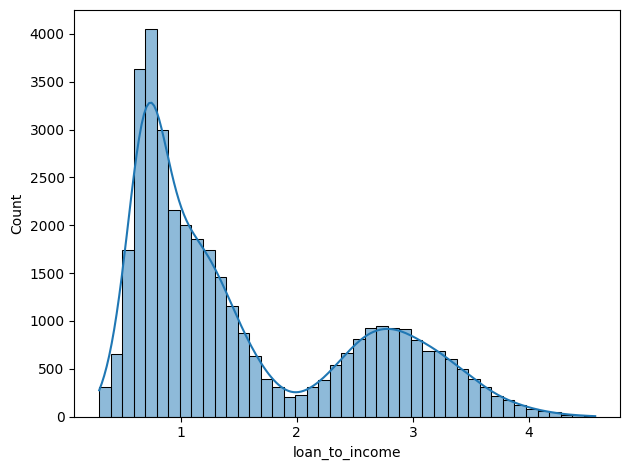

In [126]:
sns.histplot(df_train["loan_to_income"],kde=True)
plt.tight_layout()
plt.show()

In [127]:
df_train[["delinquent_months","total_loan_months"]]

,delinquent_months,total_loan_months
12746,20,152
32495,10,160
43675,12,54
9040,0,76
13077,0,60
...,...,...
28515,0,40
5558,14,52
45236,11,130
49228,0,88


In [128]:
df_train["delinquency_ratio"]=round(df_train["delinquent_months"]*100 / df_train["total_loan_months"],2)
df_train[["delinquent_months","total_loan_months","delinquency_ratio"]].head()

,delinquent_months,total_loan_months,delinquency_ratio
12746,20,152,13.16
32495,10,160,6.25
43675,12,54,22.22
9040,0,76,0.00
13077,0,60,0.00


In [129]:
df_test["delinquency_ratio"]=round(df_test["delinquent_months"]*100 / df_test["total_loan_months"],2)


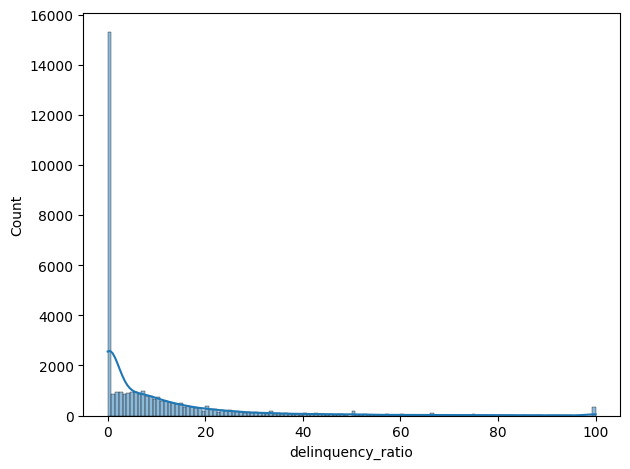

In [130]:
sns.histplot(df_train["delinquency_ratio"],kde=True)
plt.tight_layout()
plt.show()

In [131]:
df_train[["total_dpd","delinquent_months"]]

,total_dpd,delinquent_months
12746,118,20
32495,62,10
43675,67,12
9040,0,0
13077,0,0
...,...,...
28515,0,0
5558,72,14
45236,44,11
49228,0,0


In [132]:
df_train["avg_dpd_per_delinquent"]=(df_train["total_dpd"] / df_train["delinquent_months"]).round(1)


In [133]:
df_train["avg_dpd_per_delinquent"].describe()


count    22408.000000
mean         5.495814
std          1.407798
min          1.000000
25%          4.700000
50%          5.500000
75%          6.300000
max         10.000000
Name: avg_dpd_per_delinquent, dtype: float64

In [134]:
df_train["avg_dpd_per_delinquent"].isna().sum()


np.int64(15092)

In [135]:
df_train["avg_dpd_per_delinquent"] = np.where(
    df_train["delinquent_months"] != 0 ,
    (df_train["total_dpd"] / df_train["delinquent_months"]).round(1),
    0
)


df_test["avg_dpd_per_delinquent"] = np.where(
    df_test["delinquent_months"] != 0 ,
    (df_test["total_dpd"] / df_test["delinquent_months"]).round(1),
    0
)


In [136]:
df_train["avg_dpd_per_delinquent"].describe()


count    37500.000000
mean         3.284005
std          2.906551
min          0.000000
25%          0.000000
50%          4.300000
75%          5.725000
max         10.000000
Name: avg_dpd_per_delinquent, dtype: float64

In [137]:
df_train.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default',
       'loan_to_income', 'delinquency_ratio', 'avg_dpd_per_delinquent'],
      dtype='object')

### Feature Selection

In [138]:
# Dropping the coloumns which are not that useful from both test and train dataframe

df_train=df_train.drop(["cust_id","loan_id"],axis="columns")
df_test=df_test.drop(["cust_id","loan_id"],axis="columns")

In [139]:
df_train=df_train.drop(["disbursal_date","installment_start_dt","loan_amount","income","total_loan_months","delinquent_months","total_dpd"],axis="columns")
df_test=df_test.drop(["disbursal_date","installment_start_dt","loan_amount","income","total_loan_months","delinquent_months","total_dpd"],axis="columns")

In [140]:
df_train.columns

Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquent'],
      dtype='object')

In [141]:
df_train.select_dtypes(["int64","float64"]).columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquent'],
      dtype='object')

In [142]:
df_train["default"].info()

<class 'pandas.core.series.Series'>
Index: 37500 entries, 12746 to 37784
Series name: default
Non-Null Count  Dtype
--------------  -----
37500 non-null  int64
dtypes: int64(1)
memory usage: 585.9 KB


In [143]:
# Scaling the columns

X_train=df_train.drop("default" , axis="columns")
y_train=df_train["default"]

col_to_scale=X_train.select_dtypes(["int64","float64"]).columns

scaler=MinMaxScaler()
X_train[col_to_scale]=scaler.fit_transform(X_train[col_to_scale])
X_train.head()


,age,gender,marital_status,employment_status,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode,...,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquent
12746,0.788462,M,Married,Self-Employed,0.6,Owned,0.966667,Hyderabad,Telangana,0.661017,...,0.415094,1.000000,0.614342,1.000000,1.0,0.375,0.363636,0.414520,0.1316,0.59
32495,0.500000,F,Single,Salaried,0.0,Owned,0.866667,Mumbai,Maharashtra,0.491525,...,0.830189,0.093446,0.027617,0.666667,0.5,0.500,0.050505,0.306792,0.0625,0.62
43675,0.384615,M,Single,Salaried,0.0,Mortgage,0.833333,Chennai,Tamil Nadu,0.830508,...,0.490566,0.331355,0.176361,0.000000,0.5,0.375,0.000000,0.758782,0.2222,0.56
9040,0.461538,M,Married,Salaried,0.4,Mortgage,0.966667,Bangalore,Karnataka,0.762712,...,0.641509,0.204689,0.079805,0.666667,0.0,0.875,0.878788,0.194379,0.0000,0.00
13077,0.769231,M,Married,Self-Employed,0.8,Owned,0.933333,Pune,Maharashtra,0.510169,...,0.169811,0.130320,0.074567,0.000000,1.0,0.000,0.717172,0.046838,0.0000,0.00


In [144]:
X_train.describe()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquent
count,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,37500.00000,37500.000000,37500.000000,37493.000000,37500.000000,37500.000000
mean,0.414242,0.388907,0.499926,0.523500,0.090076,0.015168,0.083567,0.083567,0.376623,0.266764,0.125697,0.500969,0.50056,0.501067,0.438635,0.294289,0.103294,0.328401
std,0.189584,0.307189,0.297368,0.286500,0.119939,0.021371,0.112337,0.112337,0.234857,0.242735,0.132942,0.373023,0.40701,0.253654,0.296898,0.228024,0.172967,0.290655
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.288462,0.000000,0.233333,0.325424,0.021888,0.003631,0.020097,0.020097,0.188679,0.084440,0.036581,0.000000,0.00000,0.375000,0.181818,0.110070,0.000000,0.000000
50%,0.403846,0.400000,0.500000,0.491525,0.050676,0.008425,0.046634,0.046634,0.339623,0.199486,0.084751,0.666667,0.50000,0.500000,0.393939,0.201405,0.036800,0.430000
75%,0.538462,0.600000,0.766667,0.762712,0.099243,0.017459,0.096593,0.096593,0.547170,0.356976,0.157273,1.000000,1.00000,0.625000,0.676768,0.505855,0.129500,0.572500
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [145]:
X_test=df_test.drop("default" , axis="columns")
y_test=df_test["default"]

X_test[col_to_scale]=scaler.transform(X_test[col_to_scale])
X_test.describe()


,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquent
count,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,12499.000000,12500.000000,12500.000000
mean,0.415042,0.384912,0.502680,0.525023,0.090469,0.015322,0.083869,0.083869,0.375075,0.269817,0.127138,0.497280,0.500440,0.501470,0.436071,0.293012,0.106052,0.333764
std,0.188774,0.306840,0.298096,0.286153,0.120666,0.024380,0.112733,0.112733,0.233783,0.243561,0.134427,0.372564,0.407226,0.253607,0.295408,0.226173,0.173070,0.289692
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.288462,0.000000,0.233333,0.325424,0.022305,0.003709,0.020531,0.020531,0.188679,0.086189,0.036552,0.000000,0.000000,0.375000,0.181818,0.112412,0.000000,0.000000
50%,0.423077,0.400000,0.500000,0.510169,0.051500,0.008558,0.047366,0.047366,0.339623,0.203911,0.086297,0.333333,0.500000,0.500000,0.393939,0.201405,0.042050,0.440000
75%,0.538462,0.600000,0.766667,0.762712,0.098678,0.017349,0.095997,0.095997,0.547170,0.361722,0.160014,0.666667,1.000000,0.625000,0.676768,0.498829,0.133450,0.580000
max,1.000000,1.000000,1.000000,1.000000,0.981275,1.076411,0.963759,0.963759,1.000000,1.000000,0.939304,1.000000,1.000000,1.000000,1.000000,1.004684,1.000000,1.000000


In [146]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    data = data.fillna(data.mean()) #we had done this because we can see the 7 na values in the loan_to_income column

    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [147]:
calculate_vif(X_train[col_to_scale])

C:\Users\skd53\AppData\Roaming\Python\Python313\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Column,VIF
0,age,5.709983
1,number_of_dependants,2.730667
2,years_at_current_address,3.423488
3,zipcode,3.798723
4,sanction_amount,102.203242
5,processing_fee,15.100619
6,gst,inf
7,net_disbursement,inf
8,loan_tenure_months,6.180852
9,principal_outstanding,16.791656


In [148]:
print(X_train[col_to_scale].isna().sum())


age                            0
number_of_dependants           0
years_at_current_address       0
zipcode                        0
sanction_amount                0
processing_fee                 0
gst                            0
net_disbursement               0
loan_tenure_months             0
principal_outstanding          0
bank_balance_at_application    0
number_of_open_accounts        0
number_of_closed_accounts      0
enquiry_count                  0
credit_utilization_ratio       0
loan_to_income                 7
delinquency_ratio              0
avg_dpd_per_delinquent         0
dtype: int64


In [149]:
feature_to_drop_vif=["sanction_amount","processing_fee","gst","net_disbursement","principal_outstanding"]

In [150]:
X_train=X_train.drop(feature_to_drop_vif,axis='columns')


In [151]:
vif_df=calculate_vif(X_train.select_dtypes(["int64","float64"]))
vif_df


,Column,VIF
0,age,5.431449
1,number_of_dependants,2.726985
2,years_at_current_address,3.404246
3,zipcode,3.778463
4,loan_tenure_months,6.017806
5,bank_balance_at_application,1.835853
6,number_of_open_accounts,4.353989
7,number_of_closed_accounts,2.372621
8,enquiry_count,6.385087
9,credit_utilization_ratio,2.920148


In [152]:
# i will store all the vif columns as feature coloumns
selected_numeric_feature_vif=vif_df.Column.values
selected_numeric_feature_vif

array(['age', 'number_of_dependants', 'years_at_current_address',
       'zipcode', 'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts',
       'enquiry_count', 'credit_utilization_ratio', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquent'], dtype=object)

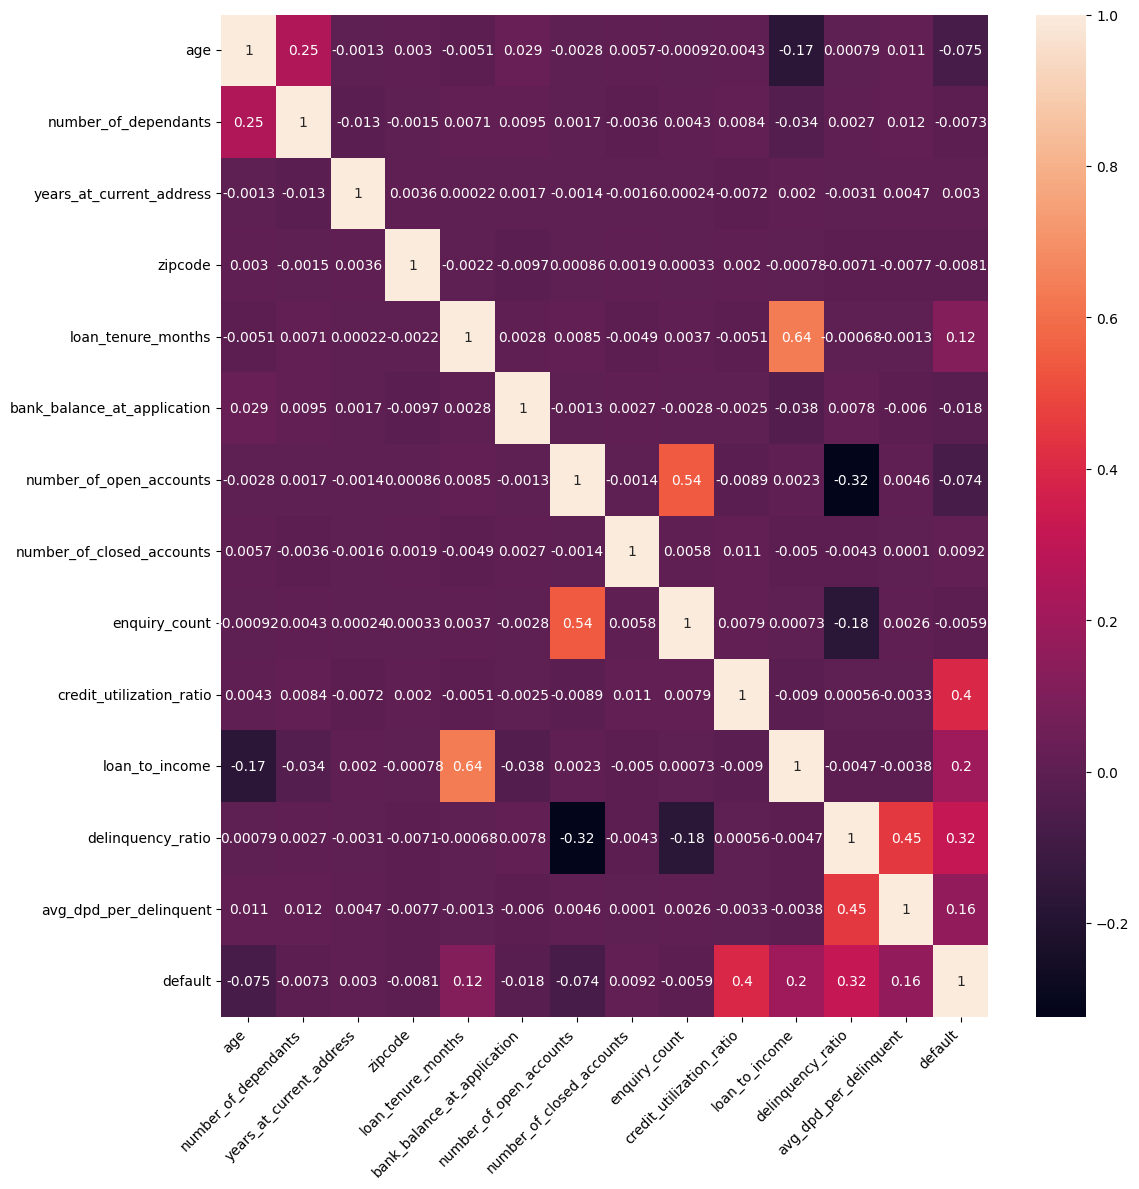

In [153]:
# correlation matrix
numeric_df = X_train.select_dtypes(include=['int64', 'float64']).copy()

# Include the target column
numeric_df['default'] = df_train['default']

# Compute correlation matrix
cm = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [154]:
def calculate_woe_iv(df,feature,target):
    grouped=df.groupby(feature)[target].agg(["count","sum"])
    grouped=grouped.rename(columns={"count":"total","sum":"good"})
    grouped["bad"]=grouped["total"]-grouped["good"]

    total_good=grouped["good"].sum()
    total_bad=grouped["bad"].sum()

    grouped["good_pct"]=grouped["good"]/total_good
    grouped["bad_pct"]=grouped["bad"]/total_bad
    grouped["woe"]=np.log(grouped["good_pct"]/grouped["bad_pct"])
    grouped["iv"]=(grouped["good_pct"]-grouped["bad_pct"])*grouped["woe"]
    grouped["woe"] = grouped["woe"].replace([np.inf, -np.inf], 0)
    grouped["iv"] = grouped["iv"].replace([np.inf, -np.inf], 0)
    
    total_iv=grouped["iv"].sum()


    return grouped, total_iv

grouped,total_iv=calculate_woe_iv(pd.concat([X_train,y_train],axis=1),"loan_purpose","default")
grouped


,total,good,bad,good_pct,bad_pct,woe,iv
loan_purpose,,,,,,,
Auto,7450,327,7123,0.101458,0.207807,-0.716962,0.076248
Education,5622,559,5063,0.173441,0.147708,0.160597,0.004133
Home,11306,1734,9572,0.538008,0.279254,0.655751,0.169678
Personal,13122,603,12519,0.187093,0.365230,-0.668924,0.119160


In [155]:
iv_values = {}

for feature in X_train.columns:
    if X_train[feature].dtype == "object":
        # directly calculate woe/iv for categorical
        _, iv = calculate_woe_iv(
            pd.concat([X_train[[feature]], y_train], axis=1), 
            feature, 
            "default"
        )
    else:
        # bin continuous variable
        x_binned = pd.cut(X_train[feature], bins=10, labels=False)
        df_temp = pd.DataFrame({feature: x_binned, "default": y_train})
        _, iv = calculate_woe_iv(df_temp, feature, "default")
    
    iv_values[feature] = round(iv,2)

iv_values


{'age': np.float64(0.09),
 'gender': np.float64(0.0),
 'marital_status': np.float64(0.0),
 'employment_status': np.float64(0.0),
 'number_of_dependants': np.float64(0.0),
 'residence_type': np.float64(0.25),
 'years_at_current_address': np.float64(0.0),
 'city': np.float64(0.0),
 'state': np.float64(0.0),
 'zipcode': np.float64(0.0),
 'loan_purpose': np.float64(0.37),
 'loan_type': np.float64(0.16),
 'loan_tenure_months': np.float64(0.22),
 'bank_balance_at_application': np.float64(0.01),
 'number_of_open_accounts': np.float64(0.08),
 'number_of_closed_accounts': np.float64(0.0),
 'enquiry_count': np.float64(0.01),
 'credit_utilization_ratio': np.float64(2.35),
 'loan_to_income': np.float64(0.48),
 'delinquency_ratio': np.float64(0.72),
 'avg_dpd_per_delinquent': np.float64(0.4)}

In [156]:
iv_df=pd.DataFrame(list(iv_values.items()),columns=["Feature","IV"])
iv_df=iv_df.sort_values(by="IV",ascending=False)
iv_df

,Feature,IV
17,credit_utilization_ratio,2.35
19,delinquency_ratio,0.72
18,loan_to_income,0.48
20,avg_dpd_per_delinquent,0.40
10,loan_purpose,0.37
5,residence_type,0.25
12,loan_tenure_months,0.22
11,loan_type,0.16
0,age,0.09
14,number_of_open_accounts,0.08


In [157]:
selected_features_iv=[feature for feature,iv in iv_values.items() if iv > 0.02]
selected_features_iv

['age',
 'residence_type',
 'loan_purpose',
 'loan_type',
 'loan_tenure_months',
 'number_of_open_accounts',
 'credit_utilization_ratio',
 'loan_to_income',
 'delinquency_ratio',
 'avg_dpd_per_delinquent']

### Feature Encoding

In [158]:
X_train_reduced=X_train[selected_features_iv]
X_test_reduced=X_test[selected_features_iv]
X_train_reduced.head()

,age,residence_type,loan_purpose,loan_type,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquent
12746,0.788462,Owned,Home,Secured,0.415094,1.000000,0.363636,0.414520,0.1316,0.59
32495,0.500000,Owned,Education,Secured,0.830189,0.666667,0.050505,0.306792,0.0625,0.62
43675,0.384615,Mortgage,Home,Secured,0.490566,0.000000,0.000000,0.758782,0.2222,0.56
9040,0.461538,Mortgage,Education,Secured,0.641509,0.666667,0.878788,0.194379,0.0000,0.00
13077,0.769231,Owned,Personal,Unsecured,0.169811,0.000000,0.717172,0.046838,0.0000,0.00


In [159]:
X_train_encoded=pd.get_dummies(X_train_reduced,drop_first=True)
X_test_encoded=pd.get_dummies(X_test_reduced,drop_first=True)
X_train_encoded.head()

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquent,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
12746,0.788462,0.415094,1.000000,0.363636,0.414520,0.1316,0.59,True,False,False,True,False,False
32495,0.500000,0.830189,0.666667,0.050505,0.306792,0.0625,0.62,True,False,True,False,False,False
43675,0.384615,0.490566,0.000000,0.000000,0.758782,0.2222,0.56,False,False,False,True,False,False
9040,0.461538,0.641509,0.666667,0.878788,0.194379,0.0000,0.00,False,False,True,False,False,False
13077,0.769231,0.169811,0.000000,0.717172,0.046838,0.0000,0.00,True,False,False,False,True,True


In [160]:
X_train_encoded.isna().sum()


age                         0
loan_tenure_months          0
number_of_open_accounts     0
credit_utilization_ratio    0
loan_to_income              7
delinquency_ratio           0
avg_dpd_per_delinquent      0
residence_type_Owned        0
residence_type_Rented       0
loan_purpose_Education      0
loan_purpose_Home           0
loan_purpose_Personal       0
loan_type_Unsecured         0
dtype: int64

In [161]:
# Impute missing values in numeric columns
for col in X_train_encoded.columns:
    median_val = X_train_encoded[col].median()
    X_train_encoded[col] = X_train_encoded[col].fillna(median_val)
    X_test_encoded[col] = X_test_encoded[col].fillna(median_val)  # use train median

### Logistic model,RandomForest Model,XGBoost model


In [162]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
log_model = LogisticRegression()
log_model.fit(X_train_encoded,y_train)


LogisticRegression()

In [163]:
y_pred=log_model.predict(X_test_encoded)
report=classification_report(y_test,y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11426
           1       0.85      0.72      0.78      1074

    accuracy                           0.96     12500
   macro avg       0.91      0.85      0.88     12500
weighted avg       0.96      0.96      0.96     12500



In [164]:
y_train.value_counts()

default
0    34277
1     3223
Name: count, dtype: int64

In [165]:
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier()
forest_model.fit(X_train_encoded,y_train)
forest_pred=forest_model.predict(X_test_encoded)
forest_report=classification_report(y_test,y_pred)
print(forest_report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11426
           1       0.85      0.72      0.78      1074

    accuracy                           0.96     12500
   macro avg       0.91      0.85      0.88     12500
weighted avg       0.96      0.96      0.96     12500



In [166]:
from xgboost import XGBClassifier
xg_model=XGBClassifier()
xg_model.fit(X_train_encoded,y_train)
xg_pred=xg_model.predict(X_test_encoded)
xg_report=classification_report(y_test,y_pred)
print(xg_report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11426
           1       0.85      0.72      0.78      1074

    accuracy                           0.96     12500
   macro avg       0.91      0.85      0.88     12500
weighted avg       0.96      0.96      0.96     12500



In [167]:
# i had tried linear model , randomforest model , xgboost model all are giving the similar performace due to class imbalance.

### Class Imbalance Model

In [168]:
from imblearn.under_sampling import RandomUnderSampler
rus=RandomUnderSampler(random_state=42)
X_train_rus,y_train_rus=rus.fit_resample(X_train_encoded,y_train)
y_train_rus.value_counts()

default
0    3223
1    3223
Name: count, dtype: int64

In [169]:
model2=LogisticRegression()
model2.fit(X_train_rus,y_train_rus)
pred=model2.predict(X_test_encoded)
report2=classification_report(y_test,pred)
print(report2)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     11426
           1       0.51      0.96      0.66      1074

    accuracy                           0.92     12500
   macro avg       0.75      0.94      0.81     12500
weighted avg       0.95      0.92      0.93     12500



In [170]:
xg_model2=XGBClassifier()
xg_model2.fit(X_train_rus,y_train_rus)
xg_pred2=xg_model2.predict(X_test_encoded)
xg_report2=classification_report(y_test,xg_pred2)
print(xg_report2)

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     11426
           1       0.56      0.96      0.71      1074

    accuracy                           0.93     12500
   macro avg       0.78      0.94      0.84     12500
weighted avg       0.96      0.93      0.94     12500



### Handeling class imbalance using SMOTE

In [171]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
X_train_smote,y_train_smote=smote.fit_resample(X_train_encoded,y_train)
print(y_train_smote.value_counts())


default
0    34277
1    34277
Name: count, dtype: int64


In [172]:
model3=LogisticRegression()
model3.fit(X_train_smote,y_train_smote)
model_pred=model3.predict(X_test_encoded)
report3=classification_report(y_test,model_pred)
print(report3)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11426
           1       0.56      0.94      0.70      1074

    accuracy                           0.93     12500
   macro avg       0.77      0.94      0.83     12500
weighted avg       0.96      0.93      0.94     12500



In [173]:
best_model = model3


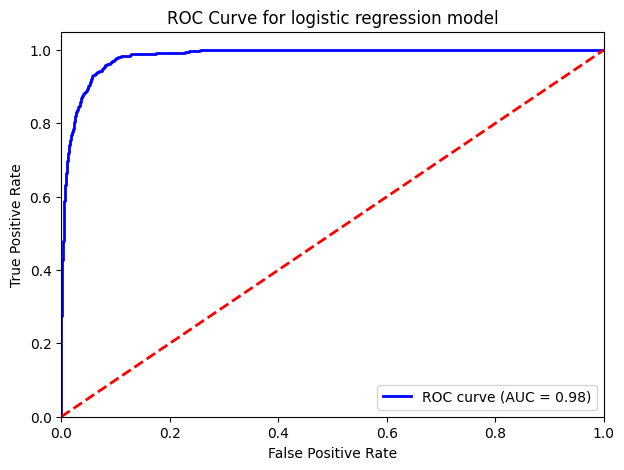

In [174]:
from sklearn.metrics import roc_curve, auc
y_prob = model3.predict_proba(X_test_encoded)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color="blue", lw=2, label="ROC curve (AUC = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="red", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for logistic regression model")
plt.legend(loc="lower right")
plt.show()

In [175]:
probabilities=np.round(best_model.predict_proba(X_test_encoded)[:, 1], 3)
probabilities

array([0.563, 0.   , 0.008, ..., 0.004, 0.81 , 0.593], shape=(12500,))

In [176]:
df_eval=pd.DataFrame({
    "default_truth":y_test,
    "default_probability":probabilities
})

df_eval.head()

,default_truth,default_probability
19205,0,0.563
15514,0,0.000
30367,0,0.008
35347,0,0.010
41814,1,0.929


In [177]:
df_eval["decile"]=pd.qcut(df_eval["default_probability"], 10, labels=False, duplicates="drop")
df_eval

,default_truth,default_probability,decile
19205,0,0.563,4
15514,0,0.000,0
30367,0,0.008,2
35347,0,0.010,2
41814,1,0.929,5
...,...,...,...
29297,0,0.001,0
20567,0,0.000,0
681,0,0.004,1
33682,0,0.810,4


In [178]:
df_grouped= df_eval.groupby('decile').apply(
    lambda x: pd.Series({
        "min_probability": x['default_probability'].min(),
        "max_probability": x['default_probability'].max(),
        "events": x['default_truth'].sum(),   # defaults = 1
        "non_events": (x['default_truth'] == 0).sum()
    }))

df_grouped.reset_index(inplace=True)
df_grouped


C:\Users\skd53\AppData\Local\Temp\ipykernel_17748\3430937651.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_grouped= df_eval.groupby('decile').apply(


,decile,min_probability,max_probability,events,non_events
0,0,0.000,0.001,0.0,6439.0
1,1,0.002,0.006,0.0,1116.0
2,2,0.007,0.035,5.0,1190.0
3,3,0.036,0.228,10.0,1242.0
4,4,0.229,0.814,160.0,1088.0
5,5,0.815,1.000,899.0,351.0


In [179]:
total_events = df_eval["default_truth"].sum()
total_non_events = (df_eval["default_truth"] == 0).sum()



df_grouped["event_rate"] = (df_grouped["events"] / total_events * 100).round(2)
df_grouped["non_event_rate"] = (df_grouped["non_events"] / total_non_events * 100).round(2)

# Sort from highest probability decile to lowest
df_grouped = df_grouped.sort_values(by="decile", ascending=False).reset_index(drop=True)

print(df_grouped)


   decile  min_probability  max_probability  events  non_events  event_rate  \
0       5            0.815            1.000   899.0       351.0       83.71   
1       4            0.229            0.814   160.0      1088.0       14.90   
2       3            0.036            0.228    10.0      1242.0        0.93   
3       2            0.007            0.035     5.0      1190.0        0.47   
4       1            0.002            0.006     0.0      1116.0        0.00   
5       0            0.000            0.001     0.0      6439.0        0.00   

   non_event_rate  
0            3.07  
1            9.52  
2           10.87  
3           10.41  
4            9.77  
5           56.35  


In [180]:
df_grouped["cum_event"]=df_grouped["events"].cumsum()
df_grouped["cum_non-event"]=df_grouped["non_events"].cumsum()
df_grouped

,decile,min_probability,max_probability,events,non_events,event_rate,non_event_rate,cum_event,cum_non-event
0,5,0.815,1.000,899.0,351.0,83.71,3.07,899.0,351.0
1,4,0.229,0.814,160.0,1088.0,14.90,9.52,1059.0,1439.0
2,3,0.036,0.228,10.0,1242.0,0.93,10.87,1069.0,2681.0
3,2,0.007,0.035,5.0,1190.0,0.47,10.41,1074.0,3871.0
4,1,0.002,0.006,0.0,1116.0,0.00,9.77,1074.0,4987.0
5,0,0.000,0.001,0.0,6439.0,0.00,56.35,1074.0,11426.0


In [181]:
df_grouped["cum_event_rate"]=df_grouped["cum_event"]*100/df_grouped["events"].sum()
df_grouped["cum_non-event_rate"]=df_grouped["cum_non-event"]*100/df_grouped["non_events"].sum()
df_grouped

,decile,min_probability,max_probability,events,non_events,event_rate,non_event_rate,cum_event,cum_non-event,cum_event_rate,cum_non-event_rate
0,5,0.815,1.000,899.0,351.0,83.71,3.07,899.0,351.0,83.705773,3.071941
1,4,0.229,0.814,160.0,1088.0,14.90,9.52,1059.0,1439.0,98.603352,12.594084
2,3,0.036,0.228,10.0,1242.0,0.93,10.87,1069.0,2681.0,99.534451,23.464029
3,2,0.007,0.035,5.0,1190.0,0.47,10.41,1074.0,3871.0,100.000000,33.878873
4,1,0.002,0.006,0.0,1116.0,0.00,9.77,1074.0,4987.0,100.000000,43.646070
5,0,0.000,0.001,0.0,6439.0,0.00,56.35,1074.0,11426.0,100.000000,100.000000


In [182]:
df_grouped["KS"]=abs(df_grouped["cum_event_rate"]-df_grouped["cum_non-event_rate"])
df_grouped

,decile,min_probability,max_probability,events,non_events,event_rate,non_event_rate,cum_event,cum_non-event,cum_event_rate,cum_non-event_rate,KS
0,5,0.815,1.000,899.0,351.0,83.71,3.07,899.0,351.0,83.705773,3.071941,80.633832
1,4,0.229,0.814,160.0,1088.0,14.90,9.52,1059.0,1439.0,98.603352,12.594084,86.009268
2,3,0.036,0.228,10.0,1242.0,0.93,10.87,1069.0,2681.0,99.534451,23.464029,76.070421
3,2,0.007,0.035,5.0,1190.0,0.47,10.41,1074.0,3871.0,100.000000,33.878873,66.121127
4,1,0.002,0.006,0.0,1116.0,0.00,9.77,1074.0,4987.0,100.000000,43.646070,56.353930
5,0,0.000,0.001,0.0,6439.0,0.00,56.35,1074.0,11426.0,100.000000,100.000000,0.000000


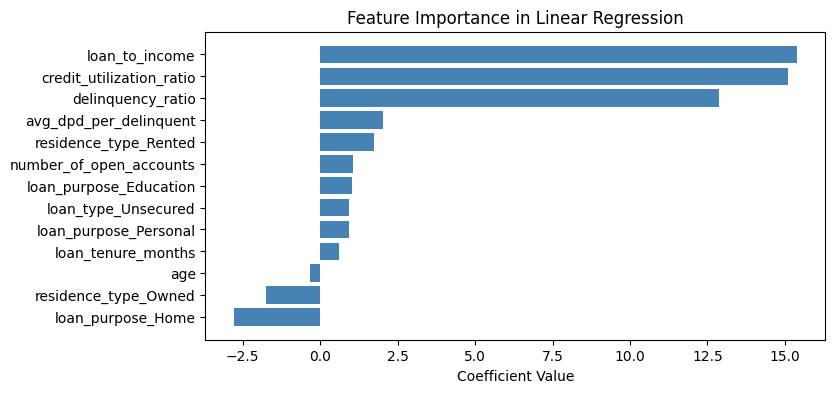

In [183]:
feature_imp=best_model.coef_[0]
coef_df=pd.DataFrame(feature_imp,index=X_train_encoded.columns,columns=["Coefficients"])

# Sort the coefficients for better visualization
coef_df=coef_df.sort_values(by="Coefficients",ascending=True)

plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Linear Regression')
plt.show()

In [185]:
from joblib import dump 
model_data={
    "model":best_model,
    "features":X_train_encoded.columns,
    "scaler":scaler,
    "cols_to_scale":col_to_scale
}

dump(model_data,r"C:\Users\skd53\OneDrive\Machine learning\ML_classification_project\Artifacts\model_data.joblib")

['C:\\Users\\skd53\\OneDrive\\Machine learning\\ML_classification_project\\Artifacts\\model_data.joblib']

In [186]:
best_model

LogisticRegression()